In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.6f}'.format

#DOS Problem Set 1

##1

In [ ]:
# Initialize arrays (length 11, all zeros)
Ft = np.zeros(16) #Followers
Ut = np.zeros(16) #Total Unfollowers
Lt = np.zeros(16) #Weekly Unfollowers
Rt = np.zeros(16) #Weekly Returners

# Loop: R uses 1-based indexing; Python uses 0-based
for i in range(15):
    Lt[i+1] = 0.08 * Ft[i]
    Rt[i+1] = 0.15 * Ut[i]
    Ut[i+1] = Ut[i] + Lt[i+1] - Rt[i+1]
    Ft[i+1] = Ft[i] + 1500 - Lt[i+1] + Rt[i+1]

# Create DataFrame
result = pd.DataFrame({
    "Followers": Ft.round(),
    "Total Unfollowers": Ut.round(),
    "Weekly Unfollowers": Lt.round(),
    "Weekly Returns": Rt.round()
})
result

,Followers,Total Unfollowers,Weekly Unfollowers,Weekly Returns
0,0.000000,0.000000,0.000000,0.000000
1,1500.000000,0.000000,0.000000,0.000000
2,2880.000000,120.000000,120.000000,0.000000
3,4168.000000,332.000000,230.000000,18.000000
4,5384.000000,616.000000,333.000000,50.000000
5,6546.000000,954.000000,431.000000,92.000000
6,7665.000000,1335.000000,524.000000,143.000000
7,8752.000000,1748.000000,613.000000,200.000000
8,9814.000000,2186.000000,700.000000,262.000000
9,10857.000000,2643.000000,785.000000,328.000000


##2 and 3

In [ ]:
def social_media_sim(followers, weeks, new, per_unfollow, per_refollows):
    Ft = np.zeros(weeks + 1)
    Ut = np.zeros(weeks + 1)
    Lt = np.zeros(weeks + 1)
    Rt = np.zeros(weeks + 1)

    for i in range(weeks):
        Lt[i+1] = per_unfollow * Ft[i]
        Rt[i+1] = per_refollows * Ut[i]
        Ut[i+1] = Ut[i] + Lt[i+1] - Rt[i+1]
        Ft[i+1] = Ft[i] + new - Lt[i+1] + Rt[i+1]
        if Ft[i+1] > followers:
          plt.bar(range (i+1+1),Ft[:i+1+1])
          plt.xticks(np.arange(0,i+2,1))
          plt.xlabel('Week')
          plt.ylabel('Followers')
          plt.title('Weekly Followers')
          return f"Goal met in week {i+1} by {round(Ft[i+1] - followers)}"

    plt.bar(range(weeks+1),Ft)
    plt.xticks(np.arange(0,weeks+1,1))
    plt.xlabel('Week')
    plt.ylabel('Followers')
    plt.title('Weekly Followers')
    return f"Goal is not met. Total followers = {round(Ft[i+1])}"

    df=pd.DataFrame({
        "Followers": Ft.round(),
        "Total Unfollowers": Ut.round(),
        "Weekly Unfollowers": Lt.round(),
        "Weekly Returns": Rt.round()})


'Goal is not met. Total followers = 16897'

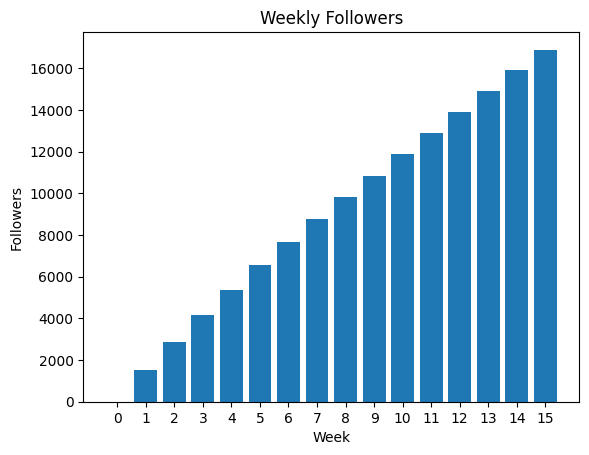

In [ ]:
social_media_sim(20000,15,1500,.08,.15)

##4

In [20]:
def find_init_users(per_new, churn, per_reactivate, act_cap, target_num, weeks):
    start = 1

    while True:
        active = start
        inactive = 0

        for i in range(weeks):
            active = active *(1+ per_new)
            active -= churn
            if active < 0:
                active = 0
            inactive += churn
            reactivated = min(inactive * per_reactivate, act_cap)
            active += reactivated
            inactive -= reactivated

        if active >= target_num:
            return start

        if active < churn and per_new <= 0:
            return "Not possible under given assumptions."

        start += 1


In [22]:
find_init_users(.15,750,.25,500,20000,20)

3233

##5

In [ ]:
x= np.array([2,4,6,8,10,12])
p= np.array([.2,.35,.05,.1,.1,.2])

In [ ]:
cdf=np.cumsum(p)
cdf

array([0.2 , 0.55, 0.6 , 0.7 , 0.8 , 1.  ])

In [ ]:
df2=pd.DataFrame({'x':x,'pmf':p,'cdf':cdf})

In [ ]:
df2

,x,pmf,cdf
0,2,0.200000,0.200000
1,4,0.350000,0.550000
2,6,0.050000,0.600000
3,8,0.100000,0.700000
4,10,0.100000,0.800000
5,12,0.200000,1.000000


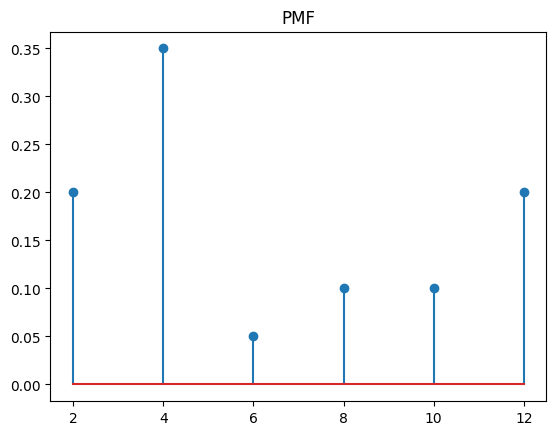

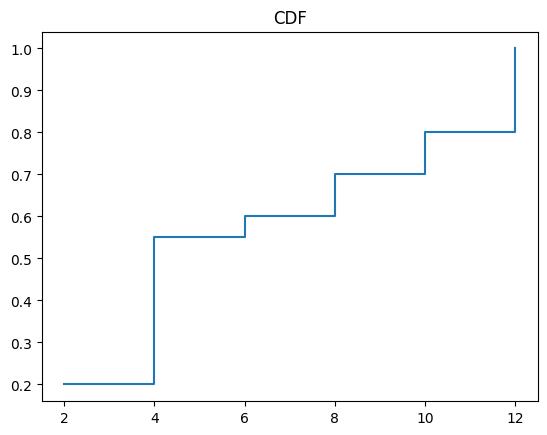

In [ ]:
plt.stem(x,p)
plt.title('PMF')
plt.show()
plt.step(x,cdf, where='post')
plt.title('CDF')
plt.show()

In [ ]:
mean = (df2.x*df2.pmf).sum()

In [ ]:
mean


np.float64(6.3)

In [ ]:
median=df2[df2.cdf>=.5]['x'].iloc[0]

In [ ]:
median

np.int64(4)

In [ ]:
mode= df2.loc[df2.pmf.idxmax(),'x']

In [ ]:
mode

np.int64(4)

In [ ]:
var= ((df2.x-mean)**2 * (df2.pmf)).sum()
var

np.float64(13.71)

In [ ]:
sd=np.sqrt(var)
sd

np.float64(3.702701716314724)

##6
On Excel

##7



In [ ]:
|#a
heads=100*.52
tails=100*.48
print(heads)
print(tails)

52.0
48.0


In [3]:
#b
from scipy.stats import binom
n=10
x2=6
p2=.52
binom.pmf(x2,n,p2)

np.float64(0.22039630340727748)

In [ ]:
#c
n=1000
x=580
p=.52
1-binom.cdf(x,n,p)

np.float64(6.160718715797486e-05)

In [ ]:
#e
n=100
p=.7
x=np.arange(0,101)
pmf2= binom.pmf(x,n,p)
df=pd.DataFrame({'x':x,'pmf':pmf2})
df

,x,pmf
0,0,0.000000
1,1,0.000000
2,2,0.000000
3,3,0.000000
4,4,0.000000
...,...,...
96,96,0.000000
97,97,0.000000
98,98,0.000000
99,99,0.000000


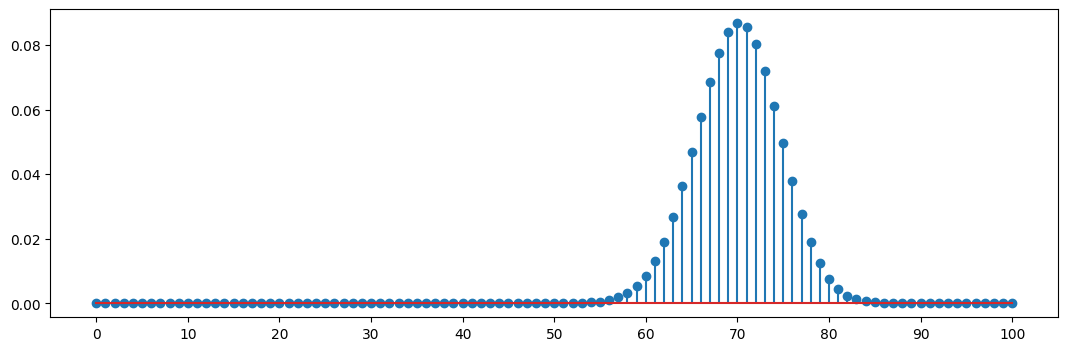

In [ ]:
plt.figure(figsize=(13,4))
plt.stem(x,pmf2)
plt.xticks(np.arange(0,101,10));

##8


In [6]:
#a
n=10
x=7
p=.41
binom.pmf(x,n,p)

np.float64(0.04799812561848699)

In [11]:
#b
k_values = list(range(0,4)) + list(range(7,11))
exact_prob = sum(binom.pmf(k, n, p) for k in k_values)
exact_prob

np.float64(0.42009564544720235)

In [10]:
results = []

for i in range(100):
    steps = np.random.choice([1, -1], size=10, p=[0.41, 0.59])
    final_position = steps.sum()
    results.append(abs(final_position) > 3)

empirical_prob = np.mean(results)
empirical_prob

np.float64(0.41)

#DOS Problem Set 2

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.6f}'.format
from scipy.stats import expon
from scipy.stats import poisson
from scipy.stats import norm

##1

In [ ]:
#a
expon.cdf(5, scale = 4)

np.float64(0.7134952031398099)

In [ ]:
#b
expon.cdf(5,scale=4)

np.float64(0.7134952031398099)

In [ ]:
#c
1-expon.cdf(6,scale=4)

np.float64(0.2231301601484298)

In [ ]:
#d
expon.cdf(3,scale=4)

np.float64(0.5276334472589853)

In [ ]:
#e
1-expon.cdf(4,scale=4)

np.float64(0.36787944117144233)

##2

In [ ]:
poisson.cdf(3,2)

np.float64(0.857123460498547)

In [ ]:
poisson.sf(3,2)

np.float64(0.14287653950145296)

In [ ]:
#a
1-poisson.cdf(3,2)

np.float64(0.14287653950145296)

In [ ]:
#b
poisson.cdf(0,2)

np.float64(0.1353352832366127)

In [ ]:
#c
poisson.pmf(0,2)

np.float64(0.1353352832366127)

In [ ]:
#d
1-poisson.cdf(3,2)

np.float64(0.14287653950145296)

In [ ]:
#e
1-poisson.cdf(4,2)

np.float64(0.052653017343711084)

In [ ]:
#f
poisson.cdf(4,2)

np.float64(0.9473469826562889)

##3

In [ ]:
possion_x=np.arange(21)
norm_x=np.linspace(0,20)
norm_x

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

Text(0.5, 1.0, 'Mean = 3')

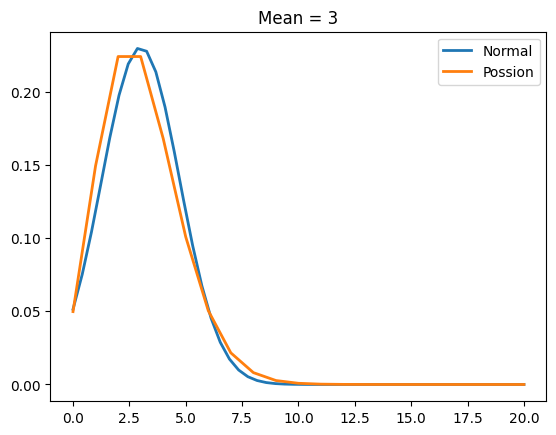

In [ ]:
plt.plot(norm_x, norm.pdf(norm_x, 3, np.sqrt(3)), linewidth=2, label='Normal')
plt.plot(possion_x, poisson.pmf(possion_x,3), linewidth=2, label='Possion')
plt.legend()
plt.title('Mean = 3')

Text(0.5, 1.0, 'Mean = 10')

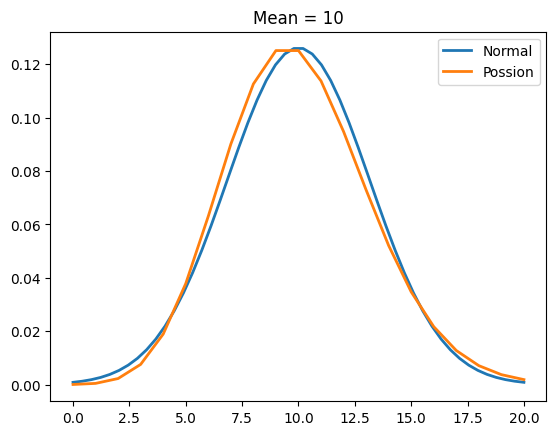

In [ ]:
plt.plot(norm_x, norm.pdf(norm_x, 10, np.sqrt(10)), linewidth=2, label='Normal')
plt.plot(possion_x, poisson.pmf(possion_x,10), linewidth=2, label='Possion')
plt.legend()
plt.title('Mean = 10')

Comment:

In both of the subplots, and the acctual x values, the possion are descrete numbers (1,2,3) whereas the normal x values looks that of a continous function.  Therefore, the possion plot looks like a line plot and the normal plot looks more like a normal distribution.  

Also, when comparing the two 'means', the mean of 3 causes to the plot to be skewed right while the mean of 10 created a more symmetric shape.  Also, when the mean = 10, the two plots looked more similar to one another compared to when the mean = 3.

##4

In [ ]:
def binest(lam,x):
  exact = poisson.cdf(x,lam)
  approx = norm.cdf(x+.5,lam, np.sqrt(lam))
  percent_error = abs(approx-exact)/exact
  percent_error = percent_error * 100
  print('Exact: ', exact.round(4))
  print('Approx: ', approx.round(4))
  print('% Error: ', percent_error.round(2))

In [ ]:
binest(4,2)

Exact:  0.2381
Approx:  0.2266
% Error:  4.82


##5

In [ ]:
#a
poisson.pmf(2,1)

np.float64(0.18393972058572114)

In [ ]:
#b
poisson.cdf(1,1)

np.float64(0.7357588823428847)

In [ ]:
#c
1-poisson.cdf(5,1)

np.float64(0.0005941848175816666)

In [ ]:
#d
p2and0=poisson.pmf(2,1) * poisson.pmf(0,1)
p2and0

np.float64(0.06766764161830634)

In [ ]:
p1and1= poisson.pmf(1,1)**2
p1and1

np.float64(0.1353352832366127)

In [ ]:
p0and2=poisson.pmf(0,1)*poisson.pmf(2,1)
p0and2

np.float64(0.06766764161830634)

In [ ]:
firstway= p2and0 + p1and1 + p0and2
firstway

np.float64(0.2706705664732254)

In [ ]:
secondway = poisson.pmf(2,2)
secondway

np.float64(0.2706705664732254)

These two way gives the same exact answer.  However the second is much easier to computer in python but you have to thinking about it harder.  The first way is the what comes to mind first since it's the mathmatical way of processing it.  I believe that because the both gives the same answer, they both are correct.

##6

In [ ]:
#a
expon.cdf(20, scale=10)

np.float64(0.8646647167633873)

In [ ]:
1-expon.cdf(20,scale=10)

np.float64(0.1353352832366127)

In [ ]:
#b
expon.cdf(10,scale=10)

np.float64(0.6321205588285577)

In [ ]:
#c
expon.ppf(.97,scale=10)

np.float64(35.065578973199806)

In [ ]:
#d
neil=1-expon.cdf(8,scale=8)
neil

np.float64(0.36787944117144233)

In [ ]:
sydney=1-expon.cdf(10,scale=10)
sydney

np.float64(0.36787944117144233)

The probability of both is the same because of the exponential distribution.  Therefore,the probability of waiting less than or equal to the average wait time is always the same, for any averages.